_This teaching material can be freely used, distributed and modified as per the [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) license._   
 _Authors: Jana Lasser (jana.lasser@ds.mpg.de), Debsankha Manik (debsankha.manik@ds.mpg.de)._  
 _This teaching material is created for the project "Daten Lesen Lernen", funded by Stifterverband and the Heinz Nixdorf Stiftung._

# Solutions to Exercise 3: Logic, conditionals and filters

### Logic

In [1]:
# 1.A
word = 'Python'

# check if the word contains the letter 'e'
print('Letter "e" in word?')
print('e' in word)

# print an empty line
print()

# check if the word is smaller than 5 characters
print('Word has less than 5 characters?')
print(len(word) < 5)

Letter "e" in word?
False

Word has less than 5 characters?
False


In [2]:
# 1.B
number = 10

if number % 2 == 0:
    print('{} is even'.format(number))
else:
    print('{} is odd'.format(number))

10 is even


### Conditionals

In [3]:
# 2.A
# 3. 
number_list = list(range(0,21))
print(number_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [4]:
# 2.B
# iterate over the numbers in number_list
for number in number_list:
    
    # check if number is less than 10
    if number < 10:
        print(number * 2)
    
    # print special message for 15
    elif number == 15:
        print("Warning: number 15 has been reached!")
    
    # if >= 10, 
    # und number != 15
    else:
        print(number / 2)

0
2
4
6
8
10
12
14
16
18
5.0
5.5
6.0
6.5
7.0
8.0
8.5
9.0
9.5
10.0


### Filter

We want to create a table containing only the surviving passengers. Remember: the column "survived" contains "1" if a passenger survived, and "0" otherwise. 

We here create a mask to filter out the pssengers who didn't survive.

In [5]:
# 3.A
# import pandas
import pandas as pd

# load the dataset
titanic_data = pd.read_csv('../data/titanic.csv')

# create the mask. 
mask_survivors = titanic_data['survived'] == 1

# filtere den Datensatz
survivors = titanic_data[mask_survivors]
survivors.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Now we want to filter by gender as well, and create separate tables for surviving men and surviving women. For this we use the column 'sex' for filtering.

In [6]:
# 3.B surviving men and women

# create a table for surviving women and filter the table
# store the result in a variable: surviving_women 
mask_surviving_women = survivors['sex'] == 'female'
surviving_women = survivors[mask_surviving_women]

# create a table for surviving women and filter the table
# store the result in a variable: surviving_men 
mask_surviving_men = survivors['sex'] == 'male'
surviving_men = survivors[mask_surviving_men]

# compute the number of surviving men and women with the `len()`
# function
num_surviving_women = len(surviving_women)
num_surviving_men = len(surviving_men)

print('{} women survived.'.format(num_surviving_women))
print('{} men survived.'.format(num_surviving_men))

233 women survived.
109 men survived.


Now we want to know in addition, the numbers of men and women among all passengers (irrespective of whether they survived or not), in order to understand what fraction of men and women survived:

In [7]:
# 3.C total passengers of titanic by gender

# two masks for each gender 
mask_women = titanic_data['sex'] == 'female'
mask_men = titanic_data['sex'] == 'male'

# now create two tables for each gender by 
# using these masks
all_women = titanic_data[mask_women]
all_men = titanic_data[mask_men]

# now obtain the number of men/women by
# using the len() function
num_women = len(all_women)
num_men = len(all_men)

print('There were {} women and {} men onboard the Titanic.'\
     .format(num_women, num_men))

print('Out of which {} women and {} men survived.'\
     .format(num_surviving_women, num_surviving_men))

There were 314 women and 577 men onboard the Titanic.
Out of which 233 women and 109 men survived.


In [8]:
# 3.D Surviving probability

# let's compute the percentage of men and women surviving 
percentage_surviving_women = num_surviving_women / num_women * 100
percentage_surviving_men = num_surviving_men / num_men * 100

print('{:1.1f}% of the women und {:1.1f}% of the men survived.'\
     .format(percentage_surviving_women, percentage_surviving_men))

74.2% of the women und 18.9% of the men survived.


3.E) When Titanic was sinking, women and children were given priority while evacuating. This explains the higher percentage of women surviving than men. If one isn't aware of this fact, one can come up with (false) explanations, e.g. :
* Women can swim better. 
* Women could scream louder and therefore could be found more easily by ships coming for rescue. 
* Women have more body fat and therefore could survive longer in the cold water.
...

In [9]:
# 3.F
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# passengers in class 1, 2, and 3

# create masks
mask_class1 = titanic_data['pclass'] == 1
mask_class2 = titanic_data['pclass'] == 2
mask_class3 = titanic_data['pclass'] == 3

# filter the table and create three new tables
total_class1 = titanic_data[mask_class1]
total_class2 = titanic_data[mask_class2]
total_class3 = titanic_data[mask_class3]

# number of passengers in each class
num_class1 = len(total_class1)
num_class2 = len(total_class2)
num_class3 = len(total_class3)

# Print intermediate result
print('**Passengers**')
print('Class 1: {}, Class 2: {}, Class 3: {}'\
     .format(num_class1, num_class2, num_class3))

# Survivors
# create mask
mask_survivors = titanic_data['survived'] == 1

# filter the dataset
survivors = titanic_data[mask_survivors]

# mask for survivors, one for each class
mask_survivors_class1 = survivors['pclass'] == 1
mask_survivors_class2 = survivors['pclass'] == 2
mask_survivors_class3 = survivors['pclass'] == 3

# filter for survivors in each class
survivors_class1 = survivors[mask_survivors_class1]
survivors_class2 = survivors[mask_survivors_class2]
survivors_class3 = survivors[mask_survivors_class3]

# compute number of survivors in each class
num_survivors_class1 = len(survivors_class1)
num_survivors_class2 = len(survivors_class2)
num_survivors_class3 = len(survivors_class3)

# Print intermediate result 
print()
print('**Surviving passengers**')
print('Class 1: {}, Class 2: {}, Class 3: {}'\
     .format(num_survivors_class1, \
             num_survivors_class2, \
             num_survivors_class3))

# Compute percentage of surviving passengers in each class
percent_survivors_class1 = num_survivors_class1 / num_class1 * 100
percent_survivors_class2 = num_survivors_class2 / num_class2 * 100
percent_survivors_class3 = num_survivors_class3 / num_class3 * 100

# Print final result
print()
print('**Survivors in each class**')
print('Class 1: {:1.2f}, Class 2: {:1.2f}, Class 3: {:1.2f}'\
     .format(percent_survivors_class1, \
             percent_survivors_class2, \
             percent_survivors_class3))

**Passengers**
Class 1: 216, Class 2: 184, Class 3: 491

**Surviving passengers**
Class 1: 136, Class 2: 87, Class 3: 119

**Survivors in each class**
Class 1: 62.96, Class 2: 47.28, Class 3: 24.24


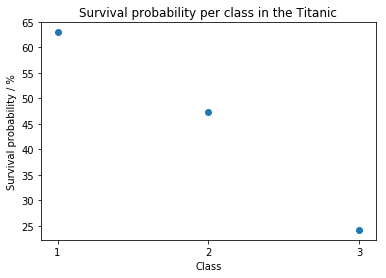

In [11]:
# Bonus: visualization

# import matplotlib.pyplot under the alias `plt`
import matplotlib.pyplot as plt
%matplotlib inline
# The class should be X axis. Therefore we create a list
# with teh classes
classes = [1, 2, 3]

# the survivors (in each class) will be the the Y axis.
# therefore we put that data in a list
survival_chance = [percent_survivors_class1, \
                   percent_survivors_class2, \
                   percent_survivors_class3]

# The function `scatter()` creates  aso-called "scatterplot"
# It draws a point in a 2-d plane spanned by the X and Y axes.
# The function must be supplied two lists. 
# The x-coordinate of each point is the value in the 
# first list (here class),
# the y coordinate is the corresponding value in the
# second list (here survival probability. 
plt.scatter(classes, survival_chance)

# The function `title()` lets us create a nice title for 
# our plot
plt.title('Survival probability per class in the Titanic')

# with the functions `xlabel()` and `ylabel()`, we describe
# what the x amd y axes mean. ALWAYS, axes of a plot must be 
# labelled, so that everyone understands what exactly a plot
# shows
plt.xlabel('Class')
plt.ylabel('Survival probability / %')

# here we make sure the ticks in the x axis is appropriate
# for the plot. Since we have three classes (1, 2 and 3),
# The x axis should have three ticks at these values. 
# Try to remove the following line (preferably commenting out
# with a #) and see what difference it makes. 
plt.gca().set_xticks([1,2,3]);